In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from sklearn import *
onlyfiles = [f for f in os.listdir(os.getcwd()) if os.path.isfile(os.path.join(os.getcwd(), f))]

In [6]:
##Importing data
filename = onlyfiles[0]
names = ['mpg',
         'cylin',
         'displ',
         'hpow',
         'weight',
         'accel',
         'myear',
         'origin']
names2 = ['mpg','cylin','displ','hpow']

data = pd.read_csv(filename, names=names)

data


,mpg,cylin,displ,hpow,weight,accel,myear,origin
0,25.0,4,98.0,-1,2046,19.0,71,1
1,21.0,6,200.0,-1,2875,17.0,74,1
2,40.9,4,85.0,-1,1,17.3,80,2
3,23.6,4,140.0,-1,1,14.3,80,1
4,34.5,4,100.0,-1,1,15.8,81,2
...,...,...,...,...,...,...,...,...
393,43.1,4,90.0,48,1985,21.5,78,2
394,44.3,4,90.0,48,1,21.7,80,2
395,43.4,4,90.0,48,1,23.7,80,2
396,26.0,4,97.0,46,1835,20.5,70,2


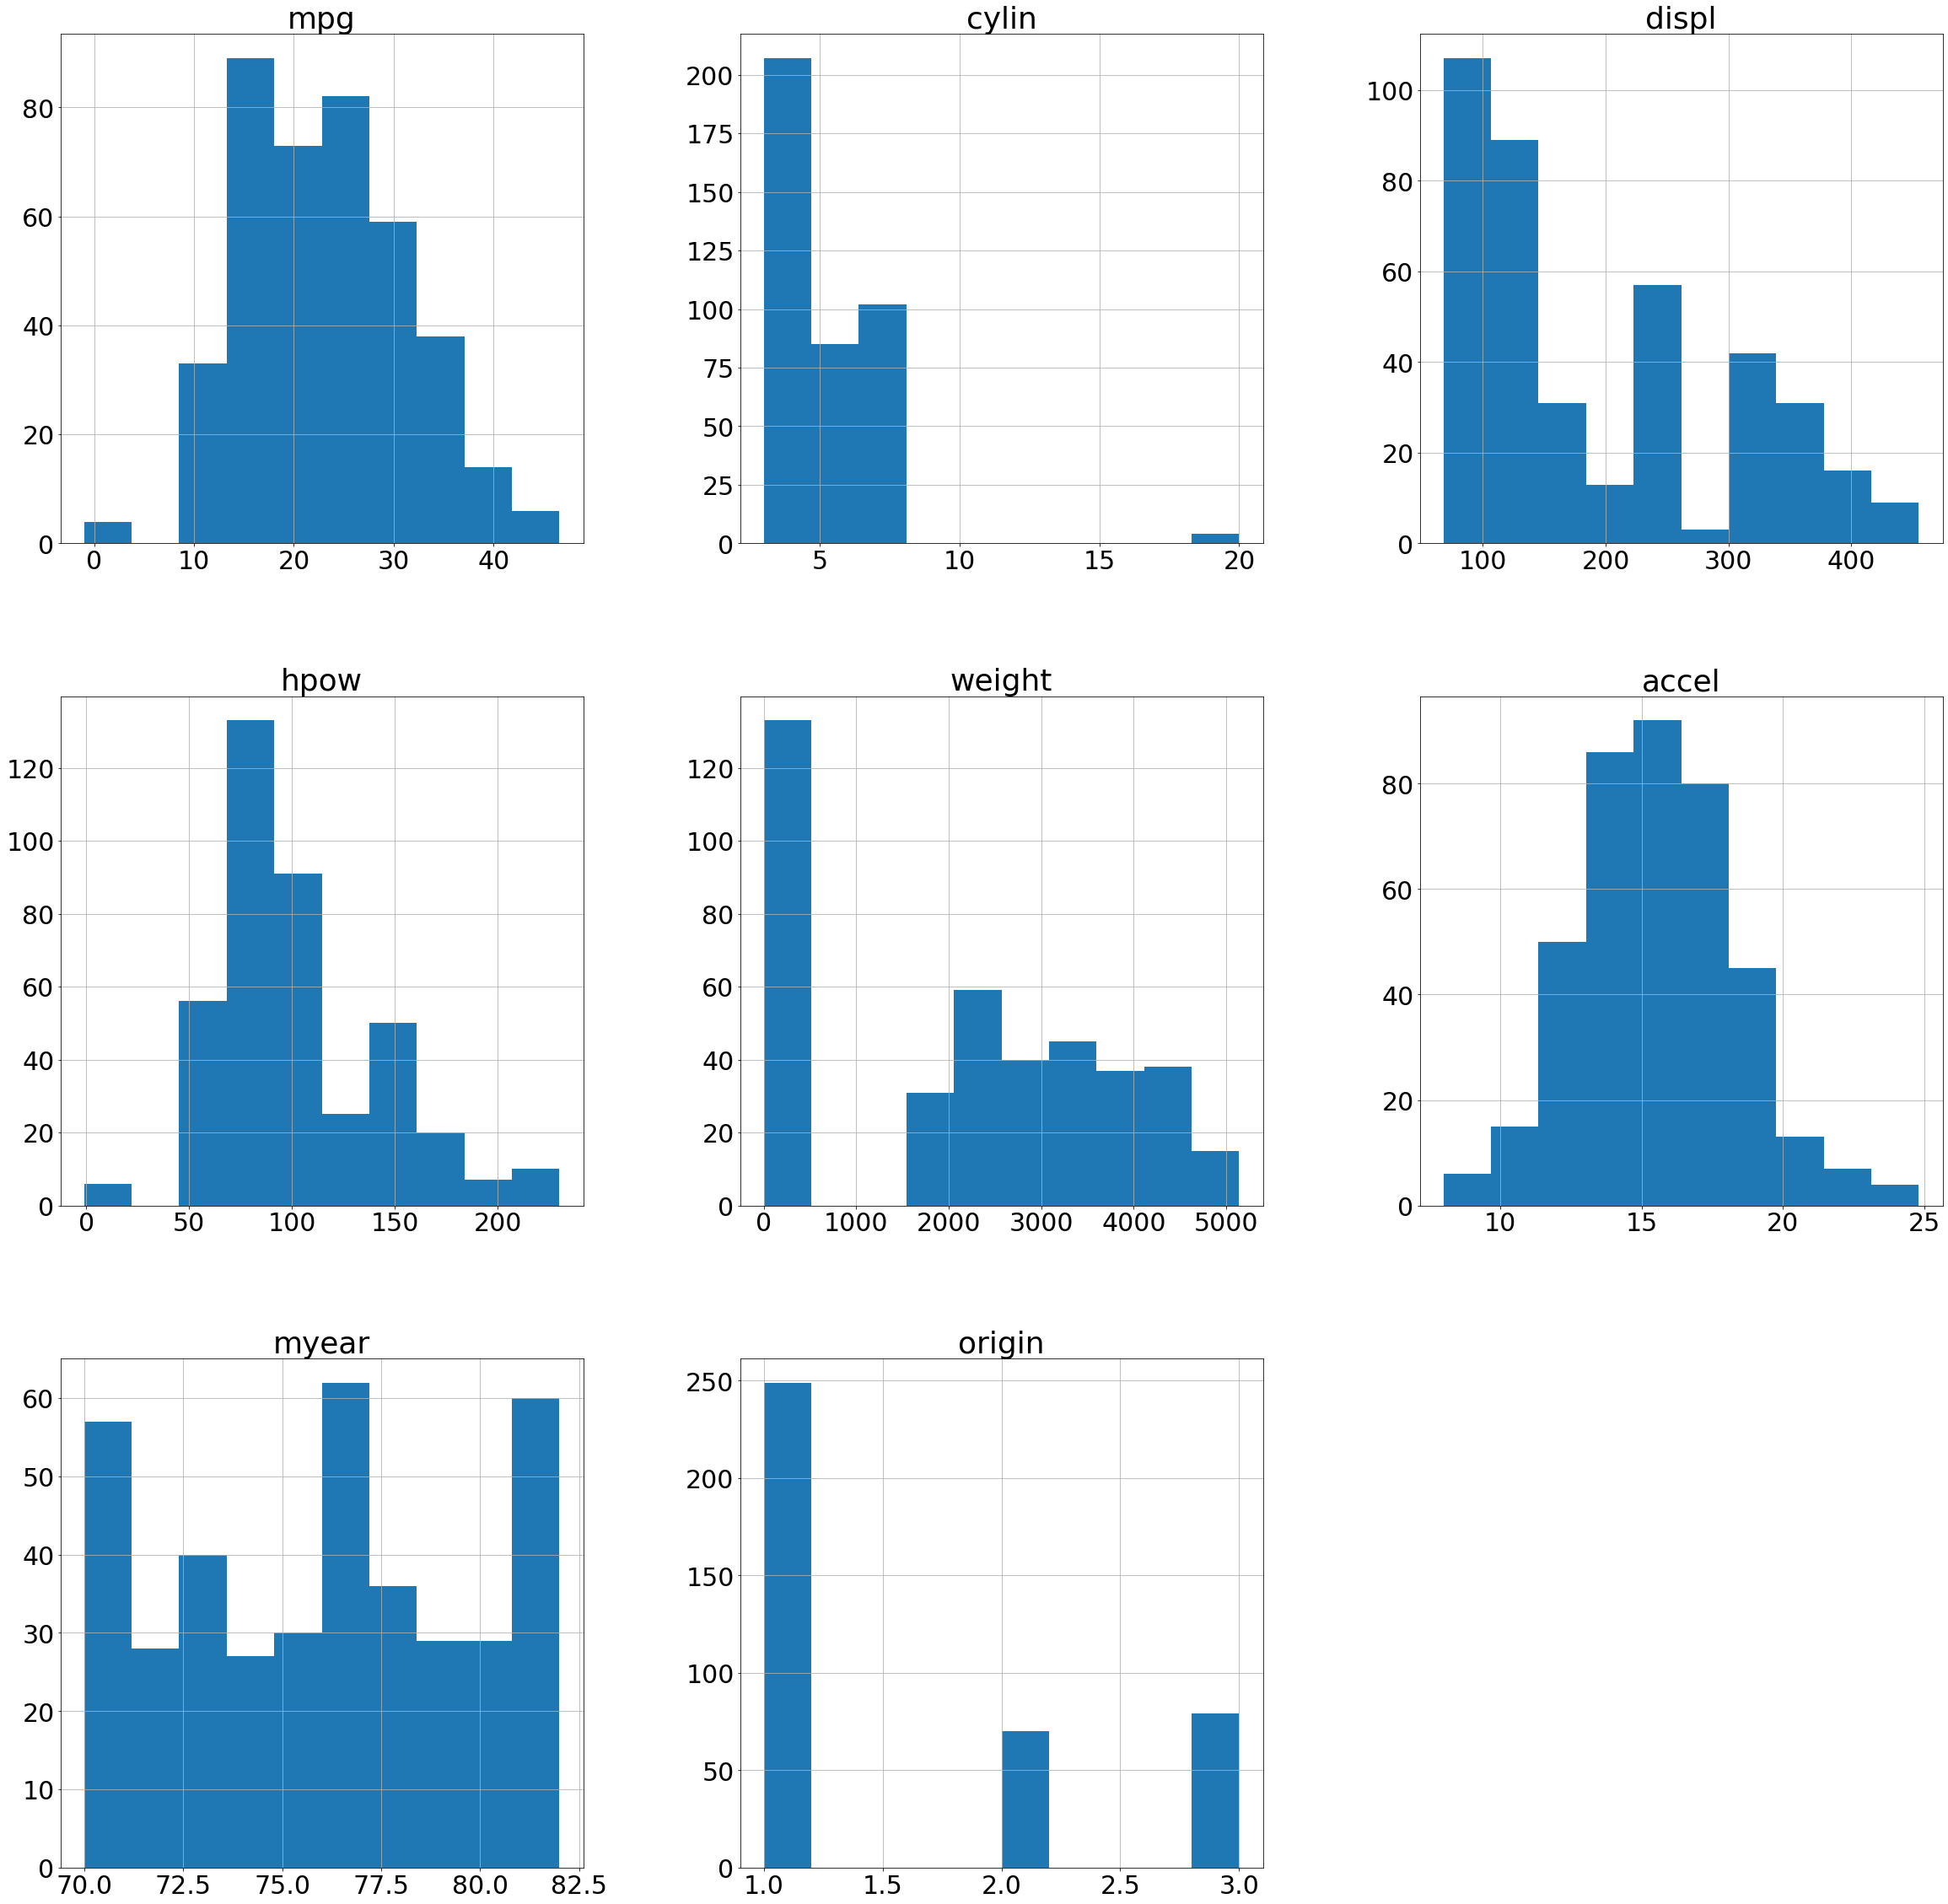

In [7]:
##Plotting resulting data
plt.rc('font', size=30)
data.hist(figsize=(40,40))
plt.show()

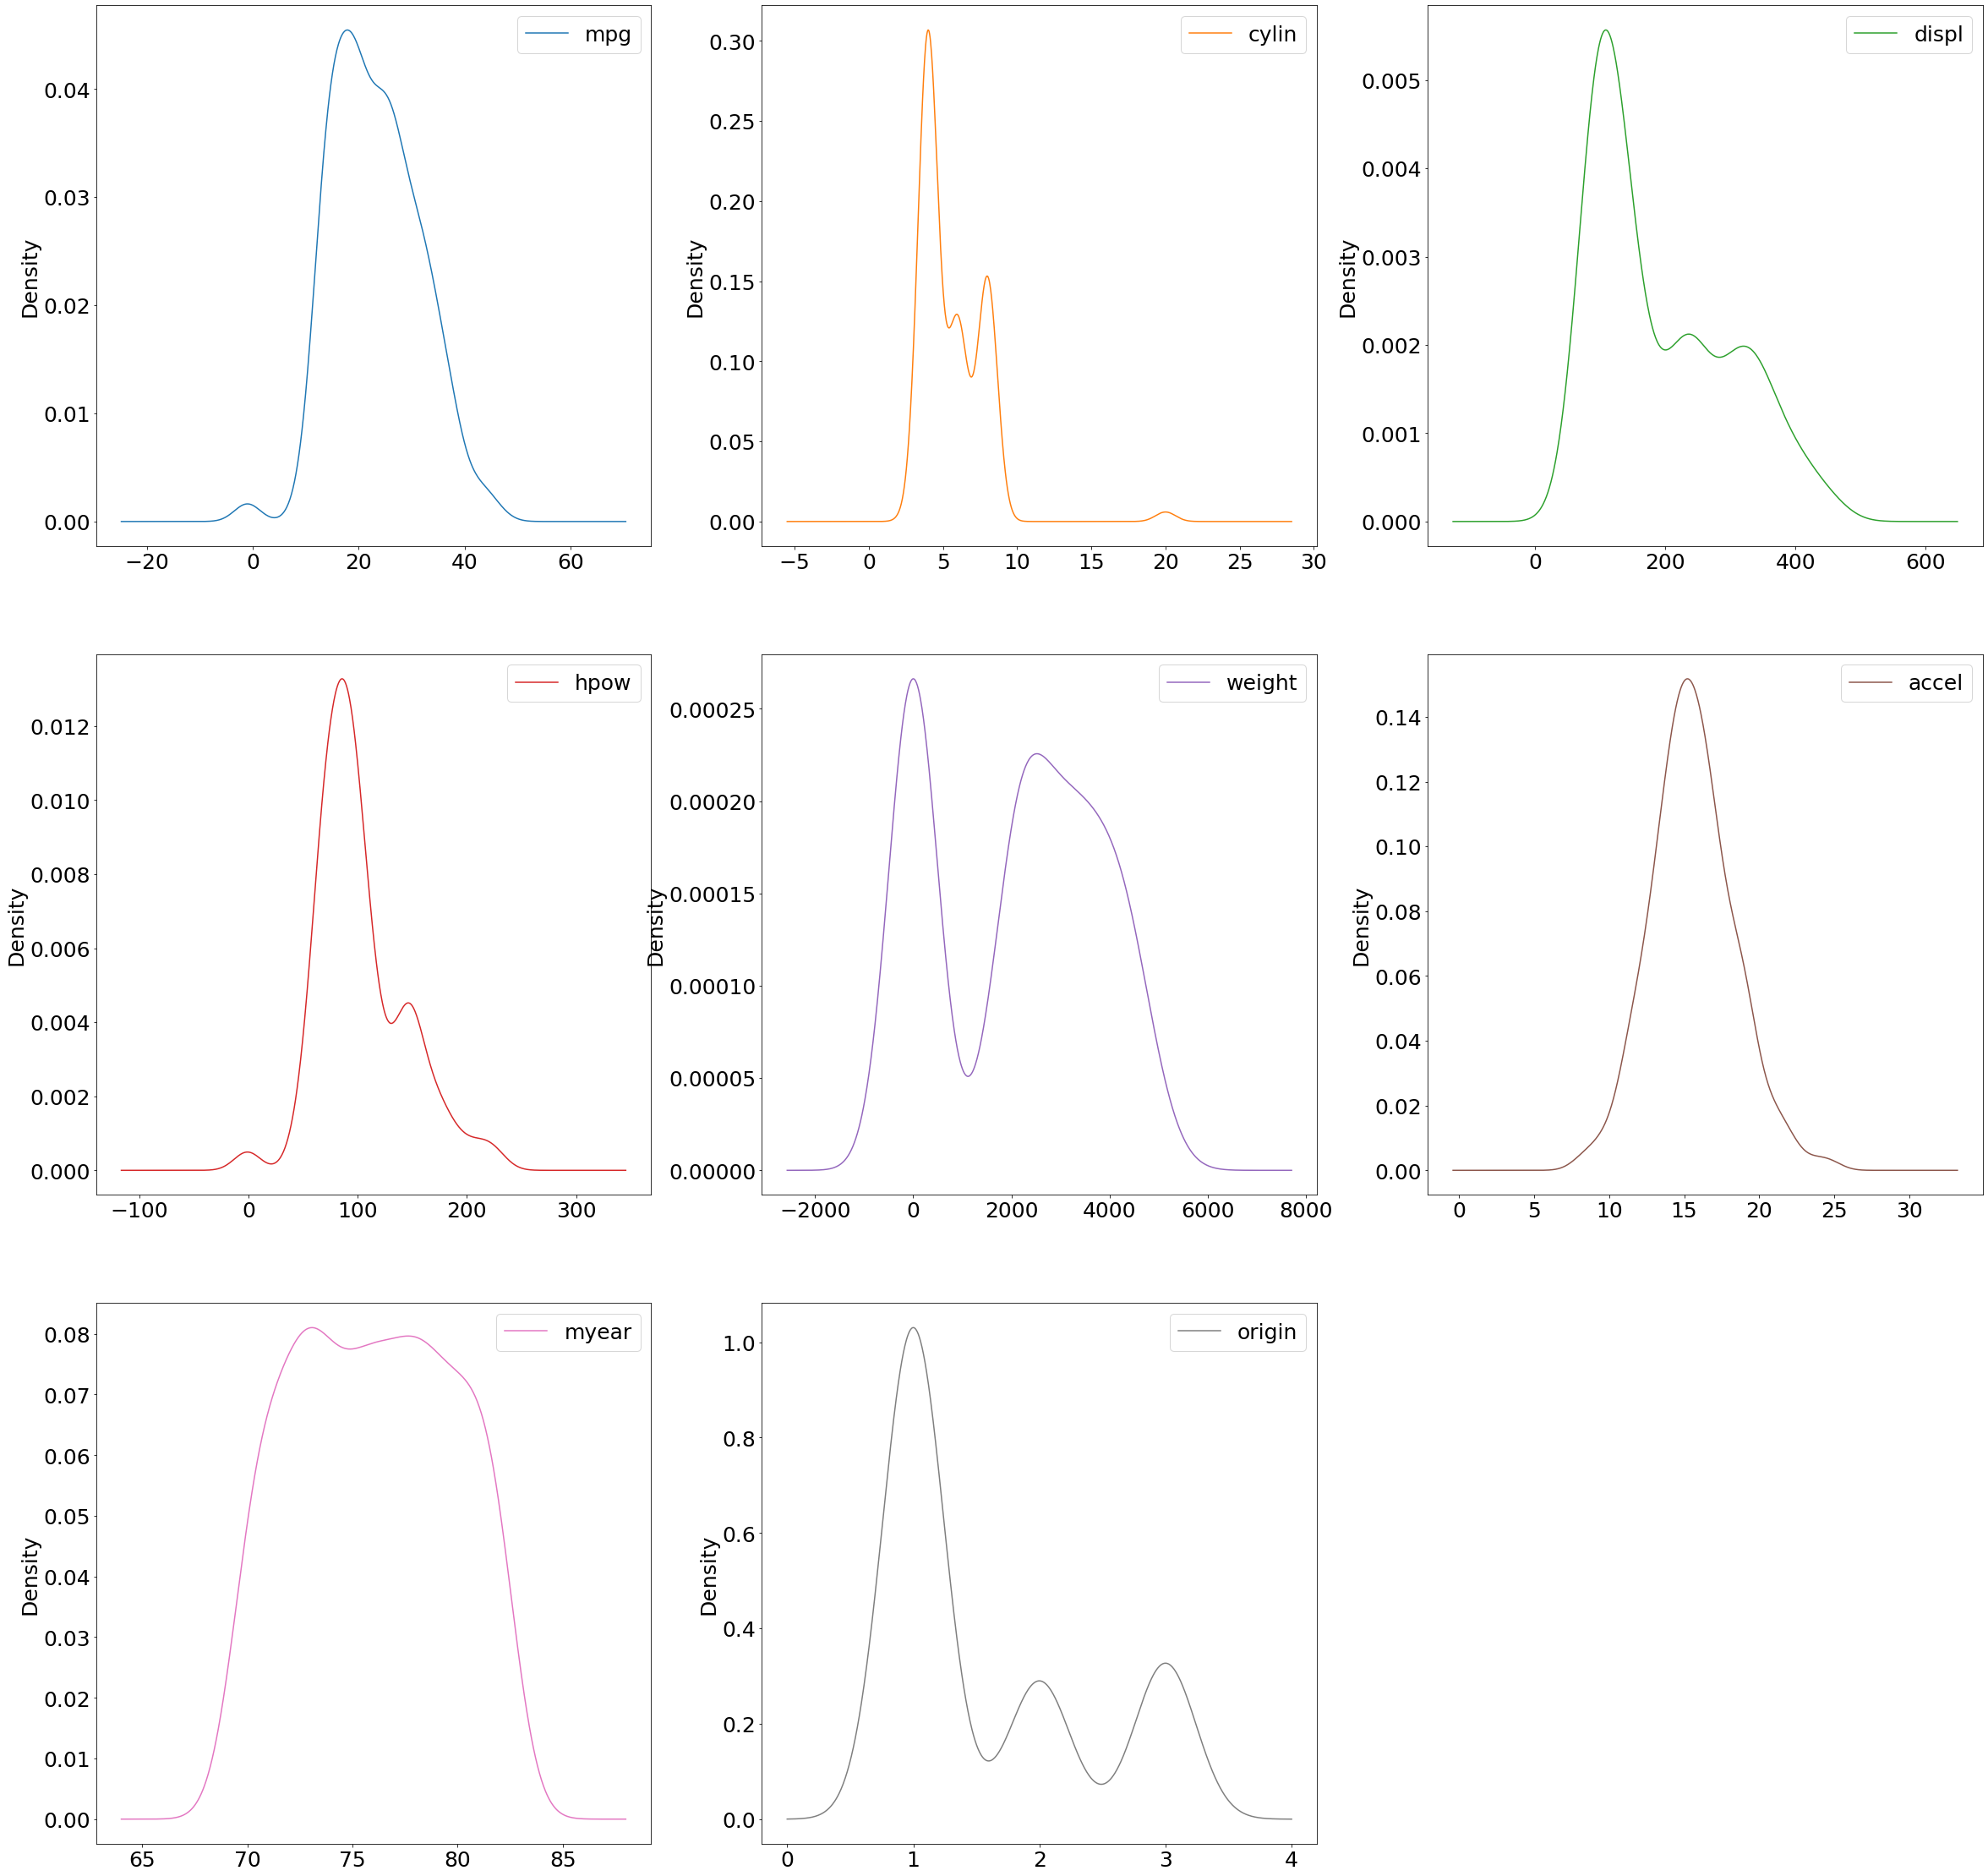

In [8]:
##Density plot
plt.rc('font', size = 25)
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=(40,40))
plt.show()

In [9]:
##Identifying any values that aren't numeric
print(data.dtypes)

mpg       float64
cylin       int64
displ     float64
hpow        int64
weight      int64
accel     float64
myear       int64
origin      int64
dtype: object


In [10]:
##Identifying missing data
print('Values equal to zero')
print((data == 0).sum())
print('\nValues below zero')
print((data < 0).sum())
print('\nStandard Deviation')
print(data.std())
print('\nMean')
print(data.mean())

Values equal to zero
mpg       0
cylin     0
displ     0
hpow      0
weight    0
accel     0
myear     0
origin    0
dtype: int64

Values below zero
mpg       4
cylin     0
displ     0
hpow      6
weight    0
accel     0
myear     0
origin    0
dtype: int64

Standard Deviation
mpg          8.146862
cylin        2.232050
displ      104.269838
hpow        40.308327
weight    1658.114159
accel        2.757689
myear        3.697627
origin       0.802055
dtype: float64

Mean
mpg         23.246985
cylin        5.595477
displ      193.425879
hpow       102.879397
weight    2094.783920
accel       15.568090
myear       76.010050
origin       1.572864
dtype: float64


In [11]:
##Marking missing data
##We remove the rows whose bmi and bloodP are 0
data[['mpg','hpow']] = data[['mpg','hpow']].mask(data[['mpg','hpow']] < 0, np.NaN)
data = data.dropna()
print(data.head(20))
print()

print('\nMissing data: ', data.isnull().sum())

##We save the cleaned data
data.to_csv('pima-cleaned.csv', header=False)

     mpg  cylin  displ   hpow  weight  accel  myear  origin
6   16.0      8  400.0  230.0    4278    9.5     73       1
7   14.0      8  455.0  225.0    4425   10.0     70       1
8   14.0      8  455.0  225.0    3086   10.0     70       1
9   12.0      8  455.0  225.0    4951   11.0     73       1
10  14.0      8  454.0  220.0    4354    9.0     70       1
11  14.0      8  440.0  215.0    4312    8.5     70       1
12  10.0      8  360.0  215.0    4615   14.0     70       1
13  13.0      8  440.0  215.0    4735   11.0     73       1
14  11.0      8  318.0  210.0    4382   13.5     70       1
15  11.0      8  429.0  208.0    4633   11.0     72       1
16  10.0      8  307.0  200.0    4376   15.0     70       1
17  15.0      8  429.0  198.0    4341   10.0     70       1
18  12.0      8  429.0  198.0    4952   11.5     73       1
19   9.0      8  304.0  193.0    4732   18.5     70       1
20  15.0      8  390.0  190.0    3850    8.5     70       1
21  13.0      8  400.0  190.0    4422   

Attribute: MPG
Summary:
N outside of two STD:	 10 	( 2.58 %)
N outside of three STD:	 0 	( 0.0 %)


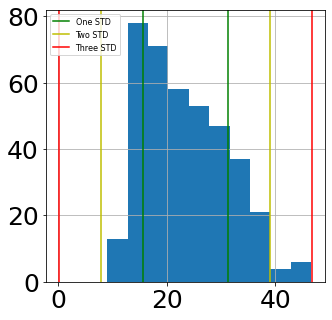

Attribute: CYLIN
Summary:
N outside of two STD:	 4 	( 1.03 %)
N outside of three STD:	 4 	( 1.03 %)


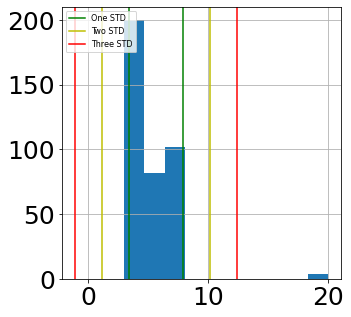

Attribute: DISPL
Summary:
N outside of two STD:	 9 	( 2.32 %)
N outside of three STD:	 0 	( 0.0 %)


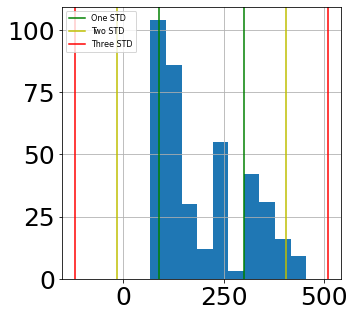

Attribute: HPOW
Summary:
N outside of two STD:	 17 	( 4.38 %)
N outside of three STD:	 4 	( 1.03 %)


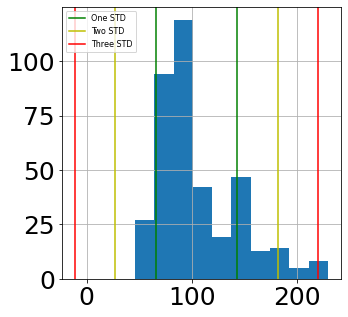

In [12]:
##Identifying outliers
def plotAttribute(featureName):
    ##Calculating stds
    oneSTD = data[featureName].std()
    twoSTD = oneSTD * 2
    threeSTD = oneSTD * 3
    meanValue = data[featureName].mean()
    
    ##Interesting data per attribute
    print("Attribute:", featureName.upper())
    print("Summary:")
    instances = data.shape[0]
    outsideTwo = ((data[featureName] < (meanValue - twoSTD)).sum() + 
                  (data[featureName] > (meanValue + twoSTD)).sum())
    outsideThree = ((data[featureName] < (meanValue - threeSTD)).sum() + 
                    (data[featureName] > (meanValue + threeSTD)).sum())

    print("N outside of two STD:\t", outsideTwo, "\t(", 
          round((outsideTwo/instances) *100, 2),"%)")
    print("N outside of three STD:\t", outsideThree, "\t(",
          round((outsideThree/instances) * 100, 2),"%)")


    ##Adding the STDs' limitors
    plt.axvline(x=(meanValue - oneSTD), label='One STD', c="g")
    plt.axvline(x=(meanValue + oneSTD), c="g")
    plt.axvline(x=(meanValue - twoSTD), label='Two STD', c="y")
    plt.axvline(x=(meanValue + twoSTD), c="y")
    plt.axvline(x=(meanValue - threeSTD), label='Three STD', c="r")
    plt.axvline(x=(meanValue + threeSTD), c="r")

    ##Represent data
    data[featureName].hist(figsize=(5,5))
    plt.legend(loc=2, prop={'size': 8})
    plt.show()
    
##Plot each attribute
for attribute in names2:
    plotAttribute(attribute)